In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from upcycle.plotting.credible_regions import get_gaussian_region
from online_gp.utils.plotting import get_arm

sns.set(font_scale=1.5, style='whitegrid')

In [2]:
# def get_arm(exp_dir, arm_name, table_name, x_col, y_col, window=1):
#     arm_path = Path(exp_dir) / arm_name
#     arm_dfs = [pd.read_csv(f) for f in arm_path.rglob(f'*{table_name}*')]
#     print(f"{len(arm_dfs)} tables found in {arm_path.as_posix()}")
# #     print([len(df) for df in arm_dfs])
#     arm_data = np.stack([df[y_col].rolling(window, min_periods=1).mean() for df in arm_dfs])
#     x_range = arm_dfs[0][x_col].values
#     mean, lb, ub = get_gaussian_region(arm_data.mean(0), arm_data.var(0))
#     return x_range, mean, lb, ub

In [3]:
palette = sns.color_palette('bright')

exp_dir = '../data/experiments/regression/timing'
dataset = 'powerplant'
lr = 1e-2
model_types = ['exact_gp_regression', 'wiski_gp_regression', 'svgp_regression']
model_labels = dict(exact_gp_regression='Exact', wiski_gp_regression='WISKI', svgp_regression='O-SVGP')
model_colors = dict(exact_gp_regression=palette[7], wiski_gp_regression=palette[4], svgp_regression=palette[0])
model_versions = dict(exact_gp_regression='v0.0.10', wiski_gp_regression='v0.0.10', svgp_regression='v0.0.10')
window = 32

1 tables found in ../data/experiments/regression/timing/exact_gp_regression-powerplant-v0.0.10
1 tables found in ../data/experiments/regression/timing/exact_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/wiski_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/wiski_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/svgp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/svgp_regression-powerplant-v0.0.10


/home/sam/miniconda3/envs/online_gp/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/sam/miniconda3/envs/online_gp/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


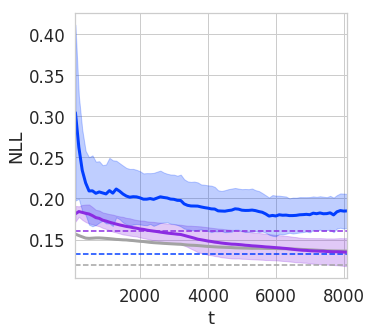

In [4]:
fig = plt.figure(figsize=(5.5, 5))
y_col = 'test_nll'
for m_type in model_types:
    arm_name = f'{m_type}-{dataset}-{model_versions[m_type]}'
    x_range, mean, lb, ub = get_arm(exp_dir, arm_name, 'online_metrics', 'step', y_col, window)
    _, batch_mean, _, _ = get_arm(exp_dir, arm_name, 'batch_metrics', 'epoch', y_col, window)
    plt.plot(x_range, mean, linewidth=3, label=model_labels[m_type], color=model_colors[m_type])
    plt.fill_between(x_range, ub, lb, alpha=0.25, color=model_colors[m_type])
    xlim = plt.xlim((x_range.values[0], x_range.values[-1]))
    plt.hlines(batch_mean[-1], *xlim, linestyle='--', color=model_colors[m_type])

# plt.legend(loc='upper right')
plt.ylabel('NLL')
plt.xlabel('t')
plt.tight_layout()
# plt.ylim((0.25, 0.75))
# plt.title(f'regression - {dataset}')
# plt.savefig(f'figures/regression/{dataset}_nll_comparison.pdf')

1 tables found in ../data/experiments/regression/timing/exact_gp_regression-powerplant-v0.0.10
1 tables found in ../data/experiments/regression/timing/exact_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/wiski_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/wiski_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/svgp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/svgp_regression-powerplant-v0.0.10


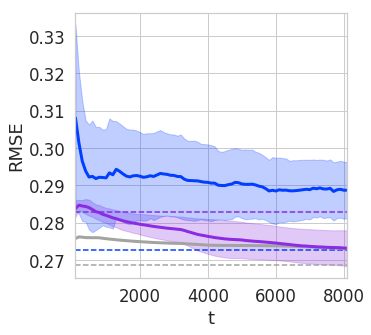

In [5]:
fig = plt.figure(figsize=(5.5, 5))
y_col = 'test_rmse'
for m_type in model_types:
    arm_name = f'{m_type}-{dataset}-{model_versions[m_type]}'
    x_range, mean, lb, ub = get_arm(exp_dir, arm_name, 'online_metrics', 'step', y_col, window)
    _, batch_mean, _, _ = get_arm(exp_dir, arm_name, 'batch_metrics', 'epoch', y_col, window)
    plt.plot(x_range, mean, linewidth=3, label=model_labels[m_type], color=model_colors[m_type])
    plt.fill_between(x_range, lb, ub, alpha=0.25, color=model_colors[m_type])
    xlim = plt.xlim((x_range.values[0], x_range.values[-1]))
    plt.hlines(batch_mean[-1], *xlim, linestyle='--', color=model_colors[m_type])

# plt.legend(loc='upper right')
plt.ylabel('RMSE')
plt.xlabel('t')
plt.tight_layout()
# plt.title(f'regression - {dataset}')
# plt.savefig(f'figures/regression/{dataset}_rmse_comparison.pdf')

1 tables found in ../data/experiments/regression/timing/exact_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/wiski_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/svgp_regression-powerplant-v0.0.10


Text(0.5, 1.0, 'regression - powerplant')

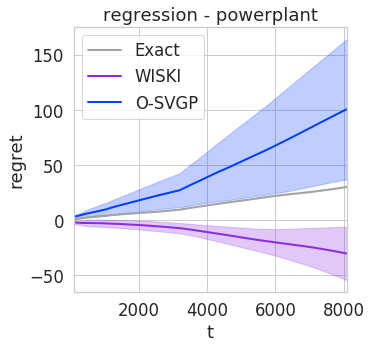

In [6]:
fig = plt.figure(figsize=(5.5, 5))
y_col = 'regret'

for m_type, m_color in zip(model_types, model_colors):
    arm_name = f'{m_type}-{dataset}-{model_versions[m_type]}'
    x_range, mean, lb, ub = get_arm(exp_dir, arm_name, 'online_metrics', 'step', y_col, window)
    plt.plot(x_range, mean, linewidth=2, label=model_labels[m_type], color=model_colors[m_type])
    plt.fill_between(x_range, lb, ub, alpha=0.25, color=model_colors[m_type])
    xlim = plt.xlim((x_range.values[0], x_range.values[-1]))

plt.legend(loc='upper left')
plt.ylabel(y_col)
plt.xlabel('t')
plt.tight_layout()
plt.title(f'regression - {dataset}')

1 tables found in ../data/experiments/regression/timing/exact_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/wiski_gp_regression-powerplant-v0.0.10
3 tables found in ../data/experiments/regression/timing/svgp_regression-powerplant-v0.0.10


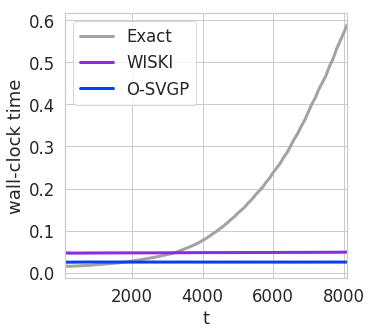

In [8]:
fig = plt.figure(figsize=(5.5, 5))
y_col = 'step_time'

for m_type, m_color in zip(model_types, model_colors):
    arm_name = f'{m_type}-{dataset}-{model_versions[m_type]}'
    x_range, mean, lb, ub = get_arm(exp_dir, arm_name, 'online_metrics', 'step', y_col, window)
    plt.plot(x_range, mean, linewidth=3, label=model_labels[m_type], color=model_colors[m_type])
    plt.fill_between(x_range, lb, ub, alpha=0.25, color=model_colors[m_type])
    xlim = plt.xlim((x_range.values[0], x_range.values[-1]))

plt.legend(loc='upper left')
plt.ylabel('wall-clock time')
plt.xlabel('t')
# plt.title(f'regression - {dataset}')
plt.tight_layout()
plt.savefig(f"figures/regression/{dataset}_timing_comparison.pdf")